In [1]:
import cpd
import pkp
import matplotlib.pyplot
import numpy as np
import pandas as pd
plt.style.use(['mystyle', 'mystyle-nb', 'mystyle-vega'])
%matplotlib inline
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/vascella/py35/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
print('PKP version {}'.format(pkp.__version__))
print('CPD version {}'.format(cpd.__version__))

PKP version 2.2.0+3.g8d18377
CPD version 0.0.2


In [3]:
def get_nmr(c):
    return {p: getattr(c, p) for p in c.nmr_parameters}

In [26]:
def compare_results(nmr_parameters, operating_conditions, name):
    ua = {'C': 74.12, 'H': 4.96, 'O': 13.18, 'N': 1.45, 'S': 0}
    pa = {'FC': 57, 'VM': 43, 'Ash': 0, 'Moist': 0}
    coal = cpd.CPD(ultimate_analysis=ua, proximate_analysis=pa, pressure=p, 
                   name=name)
    coal.set_parameters(nmr_parameters=nmr_parameters, dt=1e-6, dt_min=1e-3)
    coal.operating_conditions = operating_conditions
    print('Run CPD python...')
    res = coal.run(light_gas=True)
    res['del/2'] = 0.5 * res['delta']
    try:
        print('Read existing CPD fortran results...')
        res0 = pd.read_csv('{}.csv'.format(name))
    except:
        print('Run CPD fortran ...')
        coal0 = pkp.cpd.CPD(ultimate_analysis=ua, proximate_analysis=pa, 
                            pressure=p, name=name)

        coal0.set_parameters(nmr_parameters=nmr_parameters, dt=1e-6, 
                             dt_min=1e-3, basename=name)
        coal0.operating_conditions = operating_conditions
        res0 = coal0.run().reset_index()

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))
    ax0 = axes[0]
    ax0.set_title('Coal: {}'.format(name))
    variables0 = ['l', 'p', 'del/2']
    for v, c in zip(variables0, colors):
        res.plot(x='t', y=v, ax=ax0, color=c)
        res0.plot(x='t', y=v, ax=ax0, color=c, linestyle='dashed')
    ax0.legend(ax0.lines[::2], variables0, loc='best')

    ax1 = axes[1]
    variables1 = ['char', 'tar', 'light_gas']
    for v, c in zip(variables1, colors):
        res.plot(x='t', y=v, ax=ax1, color=c)
        res0.plot(x='t', y=v, ax=ax1, color=c, linestyle='dashed')

    ax1.legend(ax1.lines[::2], variables1, loc='best')
    
    ax2 = axes[2]
    species = ['CO', 'CO2', 'CH4', 'H2O']
    for v, c in zip(species, colors):
        res.plot(x='t', y=v, ax=ax2, color=c)
        res0.plot(x='t', y=v, ax=ax2, color=c, linestyle='dashed')
    ax2.legend(ax1.lines[::2], species, loc='best')

# Utah coal

In [19]:
operating_conditions = [[0, 600], [0.01, 1200], [0.02, 1200]]
p = 101325

In [20]:
nmr_parameters = {'mdel': 36, 'mw': 359, 'p0': 0.49, 'sig': 5.1, 'c0':0}

Run CPD python...


/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


Read existing CPD fortran results...


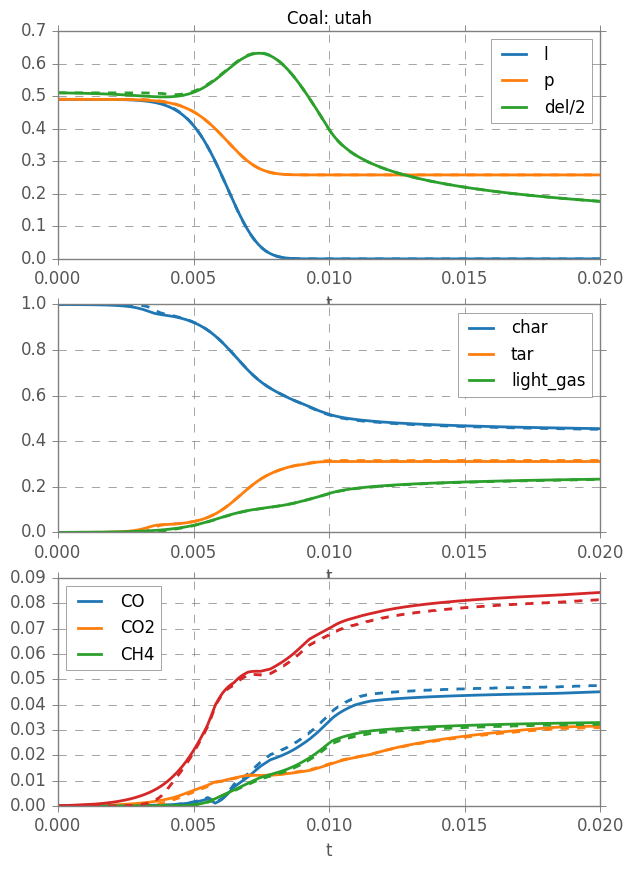

In [27]:
compare_results(nmr_parameters=nmr_parameters, 
                operating_conditions=operating_conditions, name='utah')

# Pittsburgh 8

Run CPD python...


/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


Read existing CPD fortran results...
Run CPD fortran ...


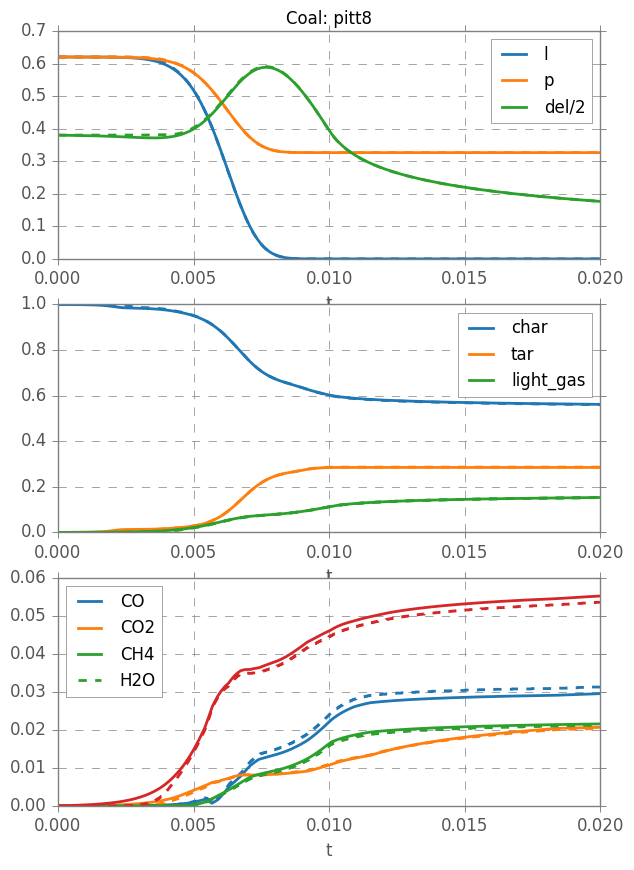

In [28]:
nmr_parameters = {'mdel': 24, 'mw': 294, 'p0': 0.62, 'sig': 4.5, 'c0':0}
compare_results(nmr_parameters=nmr_parameters, 
                operating_conditions=operating_conditions, name='pitt8')

# 1443 (lignite ACER)

Run CPD python...


/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


Read existing CPD fortran results...
Run CPD fortran ...


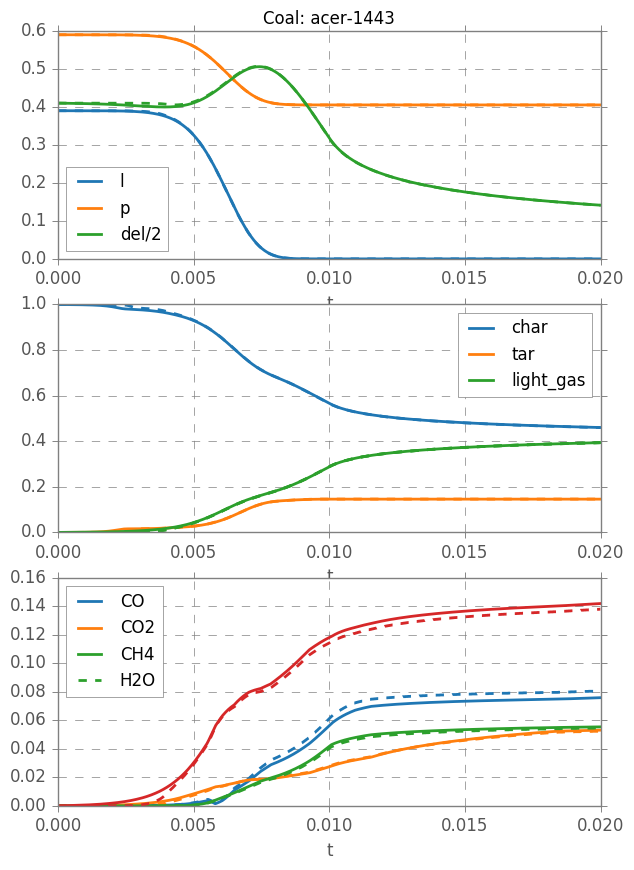

In [29]:
nmr_parameters = {'mdel': 36, 'mw': 297, 'p0': 0.59, 'sig': 4.8, 'c0':0.2}
compare_results(nmr_parameters=nmr_parameters, 
                operating_conditions=operating_conditions, name='acer-1443')

# 1448 (subbituminous ACER)

Run CPD python...


/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


Read existing CPD fortran results...
Run CPD fortran ...


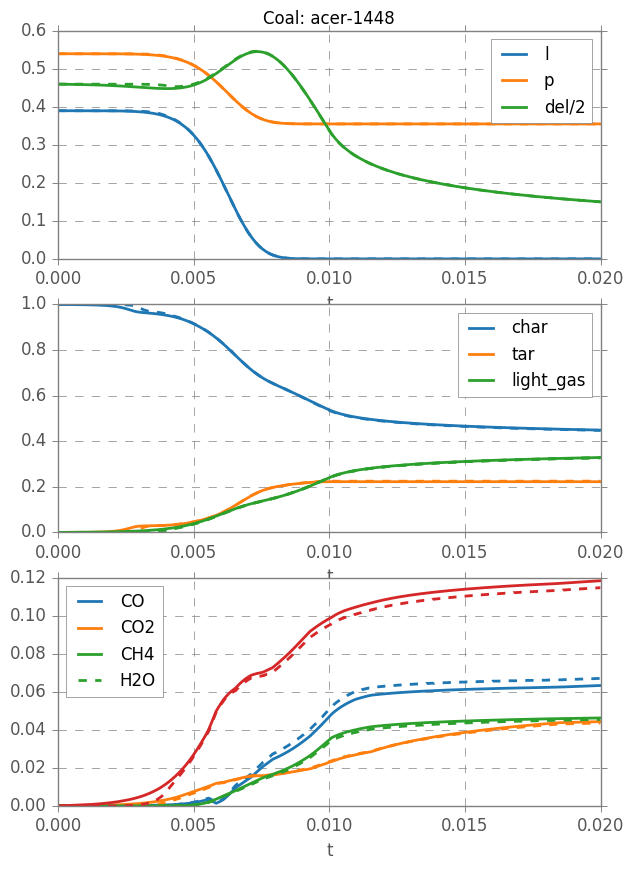

In [30]:
nmr_parameters = {'mdel': 37, 'mw': 310, 'p0': 0.54, 'sig': 4.7, 'c0':0.15}
compare_results(nmr_parameters=nmr_parameters, 
                operating_conditions=operating_conditions, name='acer-1448')

# Illinois 6

Run CPD python...


/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


Read existing CPD fortran results...
Run CPD fortran ...


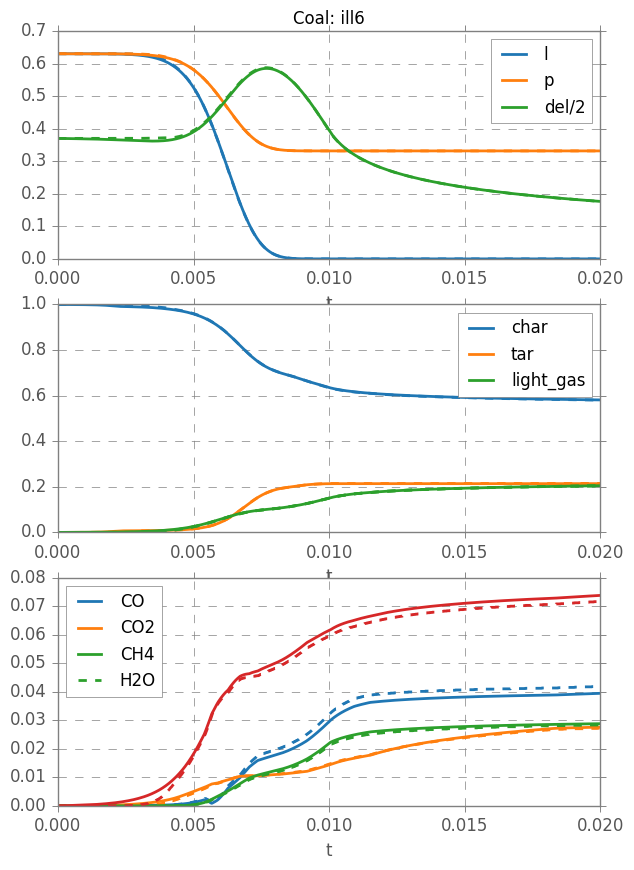

In [31]:
nmr_parameters = {'mdel': 27, 'mw': 316, 'p0': 0.63, 'sig': 5, 'c0':0}
compare_results(nmr_parameters=nmr_parameters, 
                operating_conditions=operating_conditions, name='ill6')

# Zap

Run CPD python...


/Users/vascella/py35/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


Read existing CPD fortran results...
Run CPD fortran ...


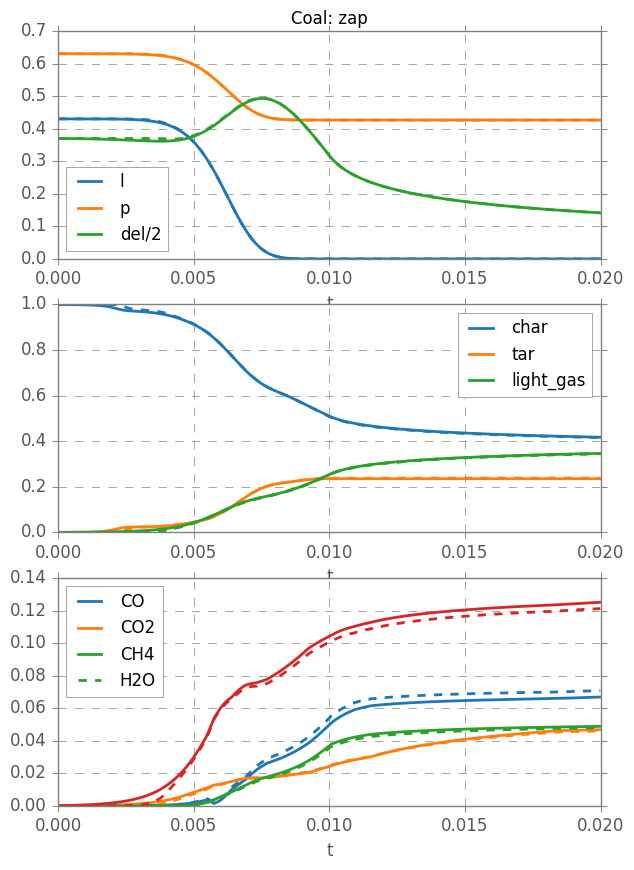

In [32]:
nmr_parameters = {'mdel': 40, 'mw': 277, 'p0': 0.63, 'sig': 3.9, 'c0':0.2}
compare_results(nmr_parameters=nmr_parameters, 
                operating_conditions=operating_conditions, name='zap')